In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Câu hỏi 3
def accuracy_score(y_test, y_pred):
    return np.mean(y_test == y_pred)

# Load the diabetes dataset
iris_X, iris_y = datasets.load_iris(return_X_y = True)

# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    iris_X,
    iris_y,
    test_size=0.2,
    random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier = knn_classifier.fit(X_train, y_train)

# Predict and Evaluate test set
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, 
               y_pred)


1.0

In [6]:
# Câu hỏi 5
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(
    diabetes_X,
    diabetes_y,
    test_size=0.2,
    random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor = knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)
np.mean((y_test - y_pred)**2)

3047.449887640449

In [ ]:
# !pip install -q datasets

In [7]:
import numpy as np
from datasets import load_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
# Load IMDB dataset
imdb = load_dataset("imdb")
imdb_train, imdb_test = imdb['train'], imdb['test']
# Convert text to vector using BoW

vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()
X_test = vectorizer.transform(imdb_test['text']).toarray()
y_train = np.array(imdb_train['label'])
y_test = np.array(imdb_test['label'])
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn_classifier.fit(X_train, y_train)
# predict test set and evaluate
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

d:\Apps\MiniConda\envs\aio\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating unsupervised split: 100%|██████████| 50000/50000 [00:00<00:00, 158696.38 examples/s]


0.60444

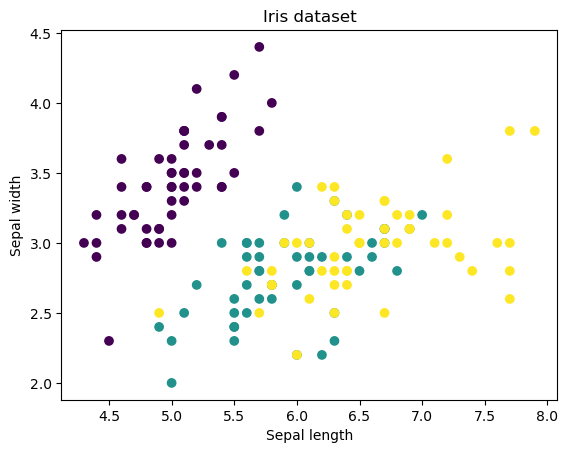

In [7]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

iris_dataset = load_iris()
data = iris_dataset.data
data = data[:, :2]

plt.scatter(data[:, 0], data[:, 1], c=iris_dataset.target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')
plt.show()



In [5]:
class KMeans:
    def __init__(self, k=3, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None
        self.clusters = None

    def initialize_centroids(self, data):
        np.random.seed(42)
        random_indices = np.random.choice(data.shape[0], self.k, replace=False)
        self.centroids = data[random_indices]
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
    def assign_clusters(self, data):
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)
    
    def update_centroids(self, data):
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])
    
    def fit(self, data):
        self.initialize_centroids(data)
        for i in range(self.max_iter):
            self.clusters = self.assign_clusters(data)
            self.plot_clusters(data, i)
            new_centroids = self.update_centroids(data)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        
        self.plot_final_clusters(data)
    
    def plot_clusters(self, data, i):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', s=300, marker='x')
        plt.title(f'Iteration {i+1}')
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

    def plot_final_clusters(self, data):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', s=300, marker='x')
        plt.title('Final clusters and centroids')
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

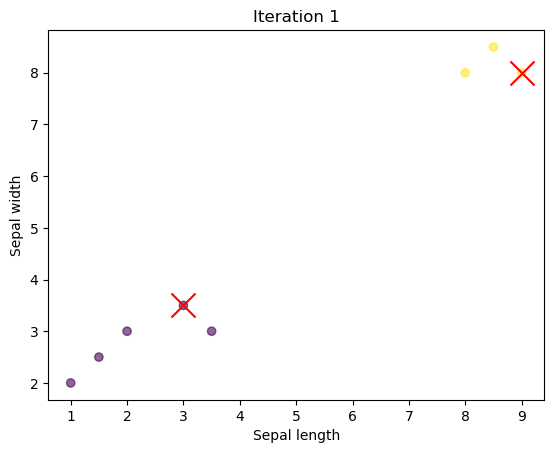

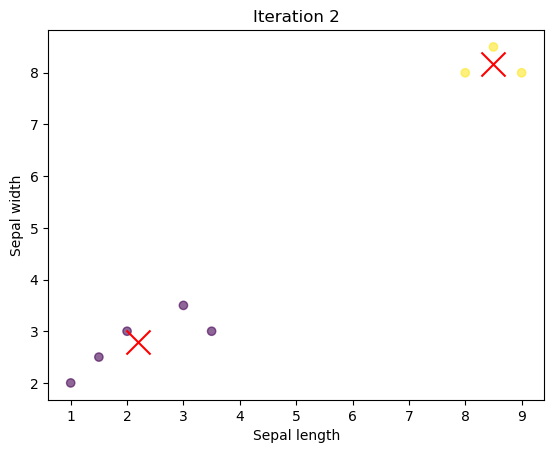

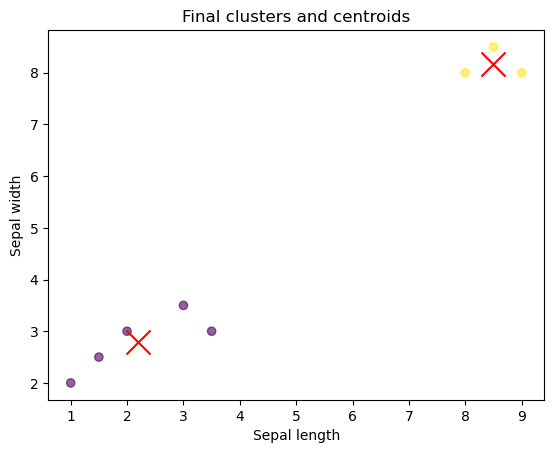

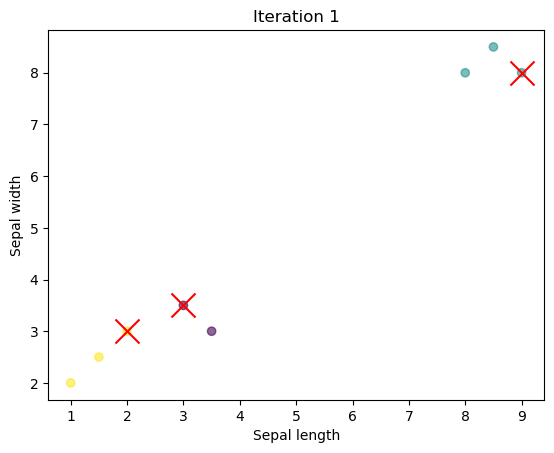

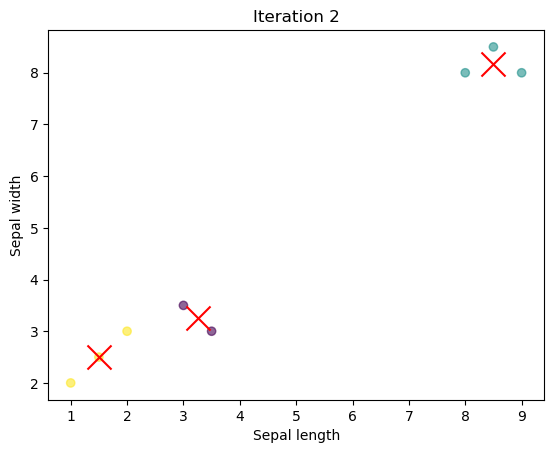

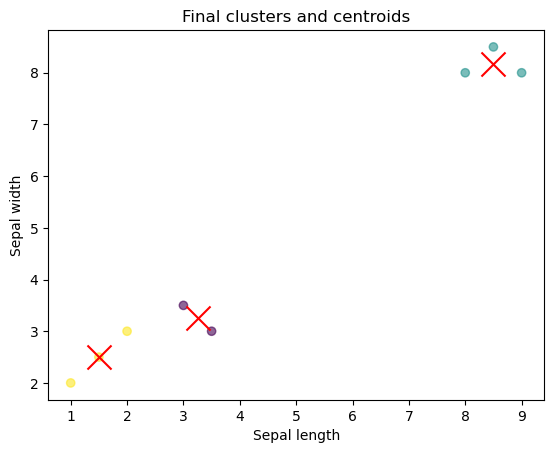

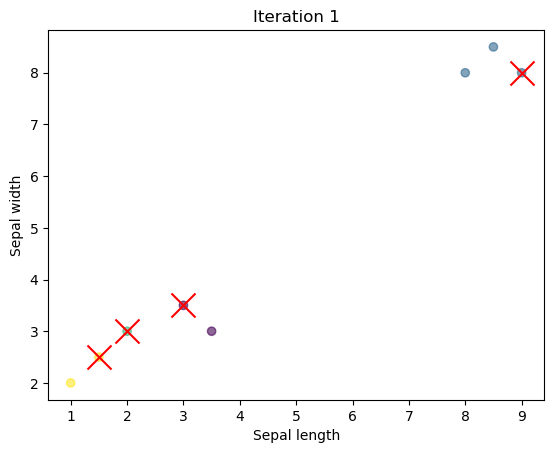

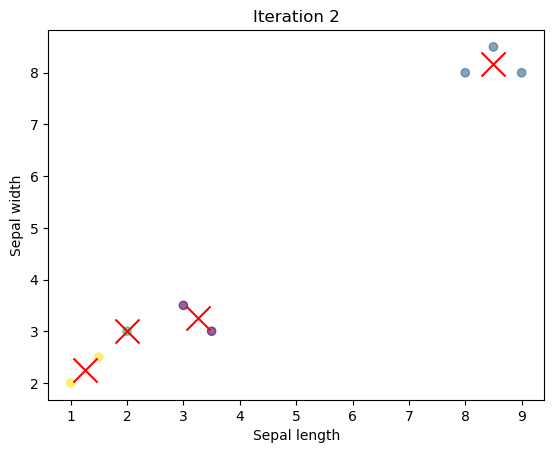

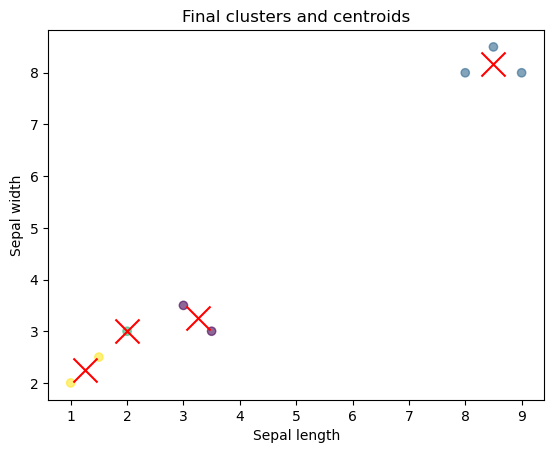

In [12]:
kmeans = KMeans(k=2)
kmeans.fit(data)

kmeans = KMeans(k=3)
kmeans.fit(data)

kmeans = KMeans(k=4)
kmeans.fit(data)



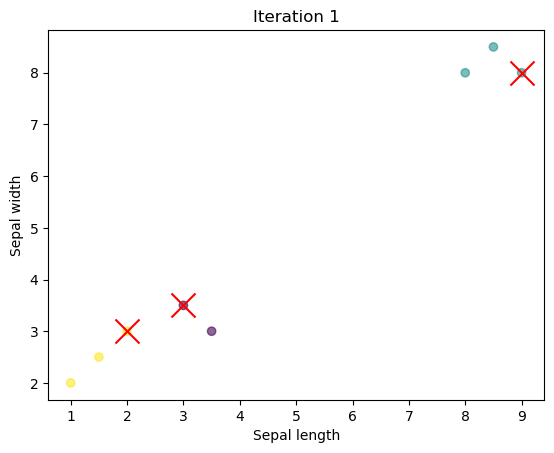

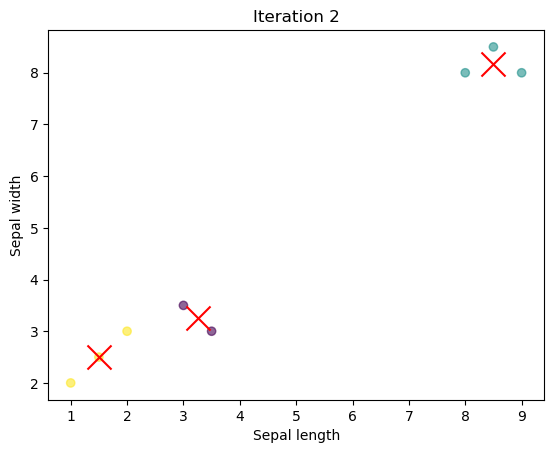

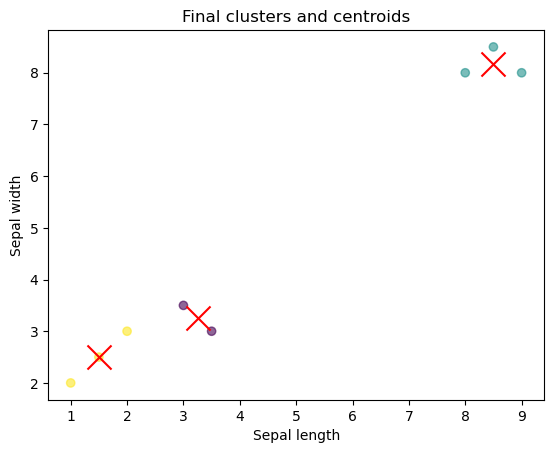

array([[3.25      , 3.25      , 2.25      ],
       [8.5       , 8.16666667, 8.        ],
       [1.5       , 2.5       , 1.33333333]])

In [11]:
# Câu hỏi 13
data = np.array([
    [2.0, 3.0, 1.5],
    [3.0, 3.5, 2.0],
    [3.5, 3.0, 2.5],
    [8.0, 8.0, 7.5],
    [8.5, 8.5, 8.0],
    [9.0, 8.0, 8.5],
    [1.0, 2.0, 1.0],
    [1.5, 2.5, 1.5]
])

kmeans = KMeans(k=3)
kmeans.fit(data)
kmeans.centroids
